In [11]:
import utils as f
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
pd.set_option('chained_assignment',None)
sns.set()

In [31]:
num_version = '0624'
df_ml = f.load_pickle('df_ml_train_{}.p'.format(num_version))
df_ml.head()

molecule_name  atom_index_0  atom_index_1  type  \
id                                                       
0   dsgdb9nsd_000001             1             0  1JHC   
1   dsgdb9nsd_000001             1             2  2JHH   
2   dsgdb9nsd_000001             1             3  2JHH   
3   dsgdb9nsd_000001             1             4  2JHH   
4   dsgdb9nsd_000001             2             0  1JHC   

    scalar_coupling_constant  nb_type type_l1 type_l2 type_l3  ai_0count  \
id                                                                         
0                    84.8076        1       0       0       0         10   
1                   -11.2570        2       0       0       1         10   
2                   -11.2548        2       0       0       1         10   
3                   -11.2543        2       0       0       1         10   
4                    84.8074        1       0       0       0         10   

    1JHC  2JHH  1JHN  2JHN  2JHC  3JHH  3JHC  3JHN  nb_atome  \
id                                                             
0      4     6     0     0     0     0     0     0         5   
1      4     6     0     0     0     0     0     0         5   
2      4     6     0     0     0     0     0     0         5   
3      4     6     0     0     0     0     0     0         5   
4      4     6     0     0     0     0     0     0         5   

    nb_atome_manquant  
id                     
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

# Preparation à la modélisation

In [32]:
X = df_ml.drop(['molecule_name','scalar_coupling_constant'],axis=1)
y = df_ml['scalar_coupling_constant']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)
X_test_type = X_test['type']
X_test = X_test.drop('type', axis=1)
X_train_type = X_train['type']
X_train = X_train.drop('type', axis=1)

In [39]:
X_train.head()

atom_index_0  atom_index_1  nb_type type_l1 type_l2 type_l3  \
id                                                                    
62178             16             5        1       0       0       0   
193757            14             7        1       0       0       0   
267                9             3        3       0       0       0   
74293             14             2        2       0       0       0   
183506            16             6        2       0       0       0   

        ai_0count  1JHC  2JHH  1JHN  2JHN  2JHC  3JHH  3JHC  3JHN  nb_atome  \
id                                                                            
62178          70    10     4     0     0    20    16    20     0        17   
193757         42     9     9     0     6     3     0    15     0        17   
267            58    10     9     0     0    12     9    18     0        14   
74293          48     8     3     0     0    12     8    17     0        15   
183506         65     9     7     1     1    14     3    20    10        18   

        nb_atome_manquant  
id                         
62178                   1  
193757                  1  
267                     0  
74293                   1  
183506                  0

In [34]:
y_train.apply(int).value_counts().shape

(197,)

In [35]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [36]:
score = f.compute_log_score(X_test_type, y_test, y_pred)
print(score)

2.8592


In [37]:
df_pred = pd.concat([X_test_type.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)

In [38]:
df_pred.sort_values(by='type', ascending=False).head(10)

type  scalar_coupling_constant          0
34941  3JHN                 -0.063870 -12.294068
42067  3JHN                  0.059228 -12.816177
24725  3JHN                 -0.168576 -13.839371
54003  3JHN                 -0.085971 -16.426956
53995  3JHN                  1.704000 -16.859903
53991  3JHN                  0.754512 -13.080085
9923   3JHN                  0.827636 -13.414249
53980  3JHN                  2.909700 -14.877767
24730  3JHN                  3.049220 -21.511480
24735  3JHN                  0.778808 -13.383742

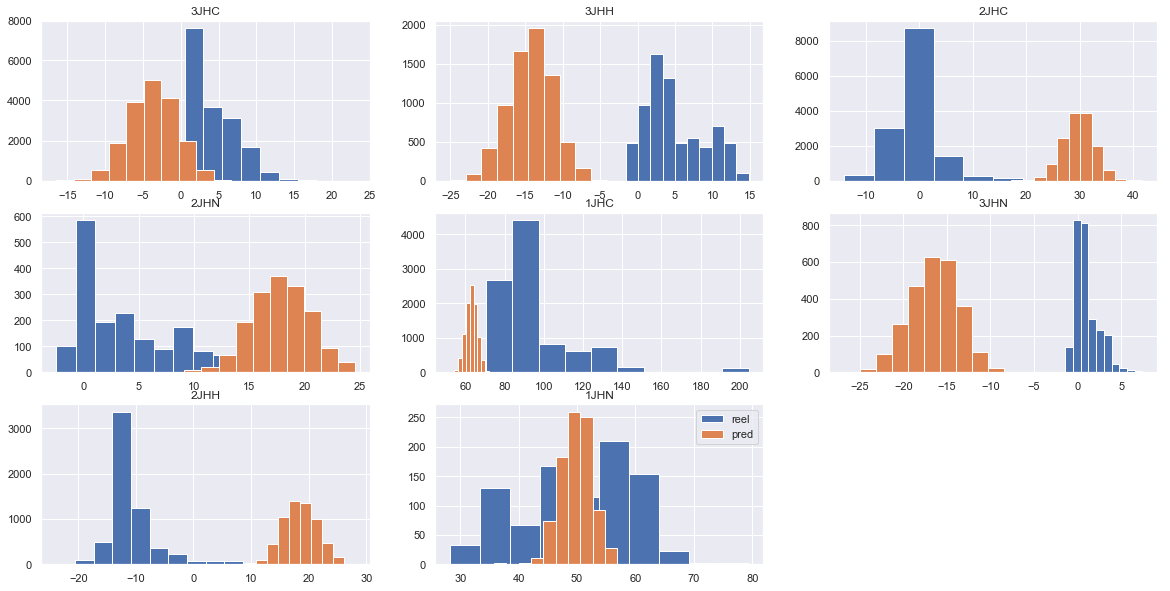

In [29]:
i=1
_= plt.figure(figsize=(20,10))
for type_ in df_pred.type.unique():
    _ = plt.subplot(3,3,i)
    df_pred.loc[df_pred['type']== type_,'scalar_coupling_constant'].hist(label='reel')
    df_pred.loc[df_pred['type']== type_,0].hist(label='pred')
    _ = plt.title(type_)
    i+=1
_ = plt.legend()
_ = plt.show()
    